Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Strojno učenje
<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

# Laboratorijska vježba 2: Regresija i perceptron

(c) 2015 Jan Šnajder

*Verzija 0.2*

Objavljeno: **10. studenog 2015.**<br>
Rok za predaju: **16-20. studenog 2015.**


## Upute

Laboratorijska vježba 2 sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg koda te evaluiranja ćelija. Odgovore na pitanja **nemojte pisati** u bilježnicu koju ćete demonstrirati asistentu (kako ih pri predaji ne bi samo čitali).

Osigurajte da u potpunosti **razumijete** kod koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta preinačiti i ponovno evaluirati Vaš kod. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Stoga se nemojte ograničiti samo na to da riješite zadatak, već slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import scipy as sp
import sklearn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Univarijatna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matrixom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = sp.array([[0],[1],[2],[4]])
y = sp.array([4,1,2,5])
N = 4

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz bilbioteke sklearn i upotrijebite je za generiranje dizajn-matrice $\mathbf{\Phi}$ sa $m=n$. Drugim riječima, generirajte dizajn-matricu bez preslikavanja u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

# m = n (feature space = ulaznoj dimenziji značajki)
poly = PolynomialFeatures(degree=1) # not using polynomial features, we are using linear ones -> degree = 1
                                    # include_bias = true -> add dummy column (default)
Design_X = poly.fit_transform(X)
print Design_X

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ dizajn-matrice, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from scipy import linalg

# multiplying matrices is not X*Y -> X.dot(Y) !
w = inv(Design_X.T.dot(Design_X)).dot(Design_X.T).dot(y)
w_pseudo = pinv(Design_X).dot(y)
print w.shape
print w_pseudo.shape

(2,)
(2,)


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{x}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

In [5]:
from sklearn.metrics import mean_squared_error
from __future__ import division

def hypothesis(x):
    return w.T.dot(x)

y_predicted = []
for i in range(N):
    y_predicted.append(hypothesis(Design_X[i,:]))
    
error = (1/2)*mean_squared_error(y, y_predicted)
print y_predicted 
print error

# Formula govori da sumira sve redke FI matrice (ulaz)
# i oduzima y_true od y_predicted i to je greska, a inace se dijeli s 1/N da se dobije srednja greška,
# dok se ovdje dijeli s 1/2 jer je kasnije lakše u računu(derivacijama) s 1/2 nego 1/N"""

[2.2000000000000002, 2.6571428571428566, 3.1142857142857134, 4.0285714285714267]
1.02142857143


**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadrante pogreške nisu posve identične. U čemu je razlika? Koja je funkcija korisnija u praksi? Zašto?

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

In [6]:
#w_ = inv(Design_X).dot(y)

# Ovakav način rješavanja sustava nema rješenja ili nema jedinstveno rješenje:
# 1) Desing_X nije kvadratna matrica pa nema inverz:
#                    a) N > (n+1) Predodređen sustav i nema rješenje
#                    b) N < (n+1) Pododređen sustav i ima višestruko rješenje
# 2) Design_X je kvadratna matrica, ali nema inverz (zbog ranga matrice)
#                    Sustav je nekonzistentan

# Problem bi se mogao rješiti preslikavanjem u višu dimenziju koristeći funkcije preslikavanaja Fi 

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću metoda `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(Design_X, y)

# The coefficients
print linear.coef_          # Estimated coefficients for the linear regression problem without w0(independet term)
print linear.intercept_     # Independent term in the linear model -> w0 

# weights from earlier cell
print w

y_predicted = linear.predict(Design_X)     
error_lr = (1/2)*mean_squared_error(y, y_predicted)
print error
print error_lr

[ 0.          0.45714286]
2.2
[ 2.2         0.45714286]
1.02142857143
1.02142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$.

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

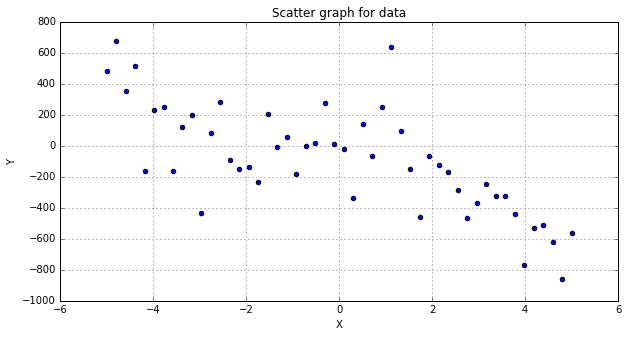

(50, 1)
(50, 1)


In [8]:
from numpy.random import normal
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5   # 10 inches in width, 5 in height

def make_labels(X,f,noise=0):
    y = []  # list is faster than np.array 
    for x in X:
        y.append(f(x) + np.random.normal(loc=0, scale=noise))
    return np.array(y) # return y as np.array (list to np.array)

def f(x):
    return 5 + x - 2*(x**2) - 5*(x**3)

# default N=50
X = np.linspace(-5,5)
sigma = 200
n = 1
y = make_labels(X,f,noise=sigma)

plt.scatter(X,y, cmap="colormap")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter graph for data')
plt.grid(True)
plt.show()

# print X.shape -> (50,) means 50 values in array not 50x1 matrix !
# Reshaping X to 50x1 matrix to apply poly_fit 
X = np.reshape(X, (len(X),n))
y = np.reshape(y, (len(y), 1))
print X.shape
print y.shape

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Error:  21508.1070951


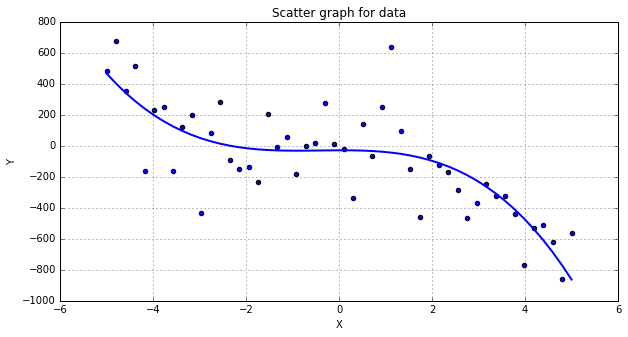

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from __future__ import division
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5   # 10 inches in width, 5 in height

N = len(X)
poly_three = PolynomialFeatures(degree=3)    # include_bias = TRUE -> add dummy column (default)
X_three = poly_three.fit_transform(X)

linear_regr = linear_model.LinearRegression()

# Train the model using the X_three(design matrix) and y
linear_regr.fit(X_three, y)

# The coefficients
#print linear_regr.coef_           # w with w0 = 0
#print linear_regr.intercept_      # w0

y_predicted_three = linear_regr.predict(X_three)
error_three = 0.5*mean_squared_error(y, y_predicted_three)
print "Error: ", error_three

# Error je jako mali, jer se overfitto na tranining set i daje skoro iste y vrijendosti 

plt.scatter(X, y, cmap="colormap")
plt.plot(X, linear_regr.predict(X_three), color='blue', linewidth=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter graph for data')
plt.grid(True)
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

Error for degree(1):  28644.9090295
Error for degree(3):  21508.1070951
Error for degree(5):  18820.1038589
Error for degree(10):  17892.1239037
Error for degree(20):  14886.8199509


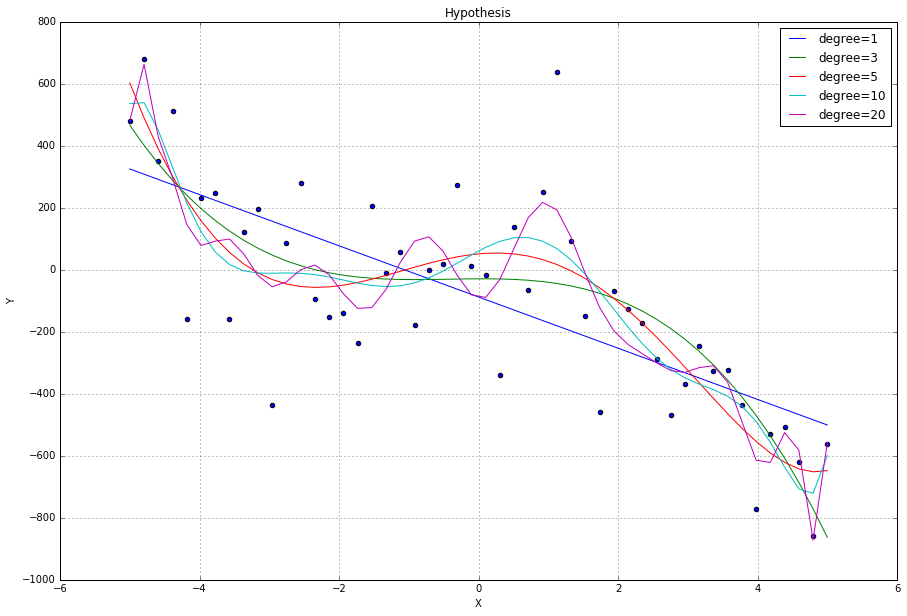

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from __future__ import division
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10   # 10 inches in width, 5 in height

degrees = [1,3,5,10,20]
N = len(X)
# plotting data set
plt.scatter(X, y, cmap="colormap")

for d in degrees:
    poly = PolynomialFeatures(degree=d)   
    X_design = poly.fit_transform(X)
    linear_regr = linear_model.LinearRegression()
    linear_regr.fit(X_design, y)

    y_predicted = linear_regr.predict(X_design)
    error = 0.5*mean_squared_error(y, y_predicted)
    print "Error for degree({}): ".format(d), error  
    plt.plot(X, linear_regr.predict(X_design), label='degree={}'.format(d),linewidth=1)

    
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hypothesis')
plt.legend(loc ='upper right')
plt.grid(True)
plt.show()

# Najmnaju grešku ima model stupnja d=3 jer f(x) koja generira podatke je trećeg stupnja pa 
# naravno model 3. stupnja će najbolje odgovarati data setu i imati će najmanju pogrešku

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in\{1,20\}$. Radi preciznosti, funkcije $h(\mathbf{x})$ iscrtajte na cijelom skupu primjera (ali pogrešku generalizacije računajte, naravno, samo na ispitnome skupu). Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

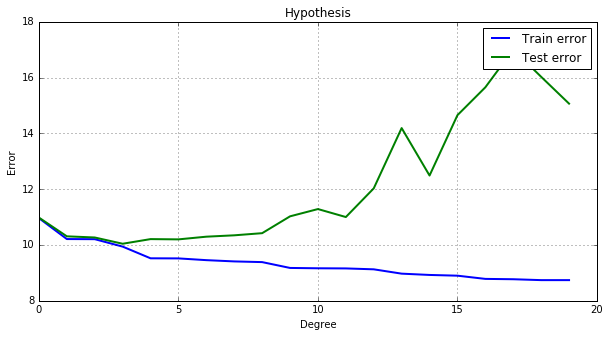

In [11]:
from sklearn import cross_validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from __future__ import division
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5   # 10 inches in width, 5 in height

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5, random_state=42)
degrees = range(20)
N = len(X)
error_train_list = []
error_test_list = []
for d in degrees:
    # include_bias = TRUE -> add dummy column (default)
    poly = PolynomialFeatures(degree=d)   
    X_train_design = poly.fit_transform(X_train)   # We need to give design matrix of test and train to PREDICT !
    X_test_design = poly.fit_transform(X_test)     # Test & train must have dummy target w0 to use predict()

    linear_regr = linear_model.LinearRegression()
    linear_regr.fit(X_train_design, y_train)
    
    predict_train = linear_regr.predict(X_train_design)
    predict_test = linear_regr.predict(X_test_design)
    
    error_train = 0.5*mean_squared_error(y_train, predict_train) 
    error_test = 0.5*mean_squared_error(y_test, predict_test)

    error_train_list.append(math.log(error_train))
    error_test_list.append(math.log(error_test))
   
 
plt.plot(degrees, error_train_list, label="Train error" ,linewidth=2 )
plt.plot(degrees, error_test_list, label="Test error",linewidth=2 )
plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Hypothesis')
plt.legend(loc ='upper right')
plt.grid(True)
plt.show()

# Odabrali bismo model za stupanj broj 3 jer greške najmanja train & test error

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

### (c)

Problem s prethodnim eksperimentom jest stohastičnost koja je posljedica slučajne podjele primjera na primjere za učenje i primjere za ispitivanje. Jedan način da se to zaobiđe jest da se fiksira podjela skupa primjere. To, međutim, uvodi proizvoljnost i ne daje pouzdanu procjenu pogreške. Bolje rješenje jest ponoviti izračun više puta s različitim podjelama skupa podataka i zatim uprosječiti vrijednosti pogreške za svaki model. Definirajte funkciju `plot_poly_regression_errors(X, degrees, ratio=0.5, repeat=30)` koja radi upravo to: funkcija uzima matricu primjera `X` i vektor oznaka `y`, dijeli ih na skup za učenje i skup za ispitivanje u omjeru `ratio` (udio skupa za ispitivanje) te trenira polinomijalne regresijske modele svih stupnjeva iz liste `degrees`, i to svaki `repeat` puta, te prikazuje grafikon uprosječenih logaritama pogrešaka.

**NB:**  Kako biste osigurali ponovljivost eksperimenta, generator pseudoslučajnih brojeva incijalizirajte nekom odabranom vrijednošću. Pritom osigurajte da svako ponavljanje eksperimenata ipak bude različito, ali da cjelokupan eksperiment bude ponovljiv.

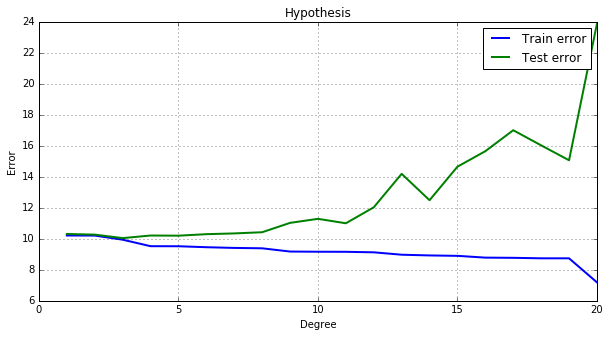

In [12]:
from sklearn import cross_validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from __future__ import division
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5   # 10 inches in width, 5 in height

def plot_poly_regression_errors(X, y, degrees, ratio=0.5, repeat=30):  
    error_train_mean = []
    error_test_mean = []

    seed(1)   # for one d in degrees seed same shuffles in repeat 
    for d in degrees:
        error_train_sum = 0
        error_test_sum = 0
        for i in range(repeat):
            X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=ratio, random_state=42)
            poly = PolynomialFeatures(degree=d)
            X_train_design = poly.fit_transform(X_train)
            X_test_design = poly.fit_transform(X_test)     # Test & train must have dummy target w0 to use predict()

            linear_regr = linear_model.LinearRegression()
            linear_regr.fit(X_train_design, y_train)

            predict_train = linear_regr.predict(X_train_design)
            predict_test = linear_regr.predict(X_test_design)

            error_train = 0.5*mean_squared_error(y_train, predict_train) 
            error_test = 0.5*mean_squared_error(y_test, predict_test)

            error_train_sum += math.log(error_train)
            error_test_sum += math.log(error_test)

        error_train_mean.append(error_train_sum/repeat)
        error_test_mean.append(error_test_sum/repeat)
     
    plt.plot(degrees, error_train_mean, label="Train error" , linewidth=2)
    plt.plot(degrees, error_test_mean, label="Test error", linewidth=2)   
    plt.xlabel('Degree')
    plt.ylabel('Error')
    plt.title('Hypothesis')
    plt.legend(loc ='upper right')
    plt.grid(True)
    plt.show() 

degrees = range(1,21)
plot_poly_regression_errors(X, y, degrees, ratio=0.5, repeat=30)

### (d)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za sve kombinacija broja primjera $N\in\{100,200,1000\}$ i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera), zatim generirajte tri parova skupova za učenje i ispitivanje, svaki s različitom količinom šuma. Naposlijetku iz tih skupova izdvojite dodatne podskupove od $N=200$ primjera ($100$ za učenje i $100$ za ispitivanje) i $N=100$ primjera ($50$ za učenje i $50$ za ispitivanje).

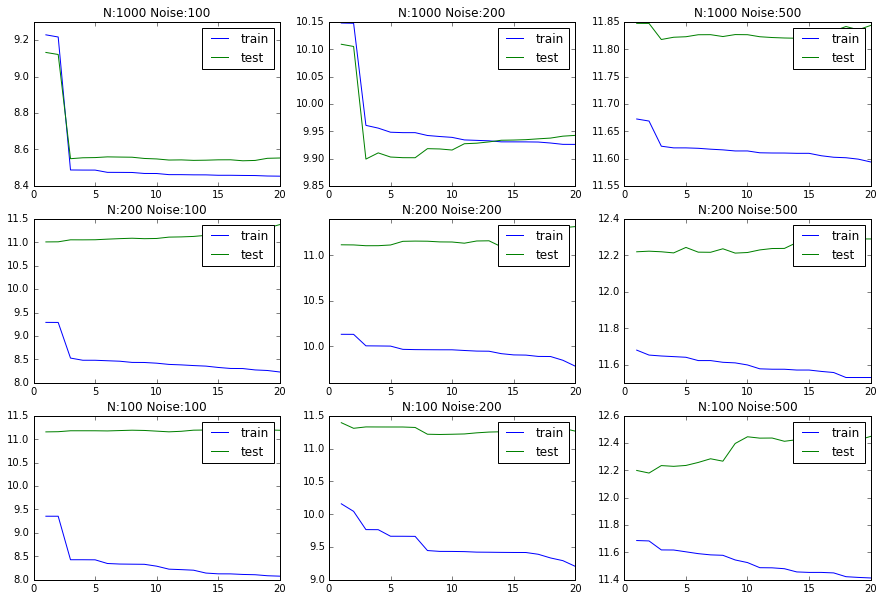

In [13]:
from numpy.random import normal
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10   # 10 inches in width, 5 in height

def make_labels(X,f,noise=0):
    y = []  # list is faster than np.array 
    for x in X:
        y.append(f(x) + np.random.normal(loc=0, scale=noise))
    return np.array(y) # return y as np.array (list to np.array)

def f(x):
    return 5 + x - 2*(x**2) - 5*(x**3)

# Process
N = [1000, 200, 100]
sigma = [100, 200, 500]

X = np.linspace(-5,5,1000)
X = np.reshape(X, (len(X),1))
numpy.random.shuffle(X)
X_train1, X_test1 = X[0:500], X[500:]
X_train2, X_test2 = X_train1[0:100], X_test1[100:200]
X_train3, X_test3 = X_train1[200:250], X_test1[250:300]


y_train_list1 = []
y_test_list1 = []
for noise in sigma: 
    y_train_list1.append(make_labels(X_train1, f, noise)) #y train 500
    y_test_list1.append(make_labels(X_test1, f, noise))   #y test 500
                        
y_train_list2 = [] 
y_test_list2 = []
y_train_list3 = []
y_test_list3 = []
                        
for y_train in y_train_list1:
    y_train_list2.append(y_train[0:100])    # y train 100
    y_test_list2.append(y_train[100:200])   # y test 100
    y_train_list3.append(y_train[200:250])  # y train 50
    y_test_list3.append(y_train[250:300])   # y test 50

# train_list1 = N500, train_list2 = N200, train_list3 = N100
# y train_list1,2,3 = noises[100, 200, 500]
ytrain = [y_train_list1, y_train_list2, y_train_list3]
ytest = [y_test_list1, y_test_list2, y_test_list3]
xtrain = [X_train1, X_train2, X_train3]
xtest = [X_test1, X_test2, X_test3]

count = 1
degrees = range(1,21)
for i in range(3):
    for j in range(3):
        train = list()
        test = list()
        for d in degrees:
            p = PolynomialFeatures(d)
            FI_train = p.fit_transform(xtrain[i])
            FI_test = p.fit_transform(xtest[i])
            LR = LinearRegression()
            LR.fit(FI_train, ytrain[i][j])
            predict_train = LR.predict(FI_train)
            predict_test = LR.predict(FI_test)
            train.append(math.log(0.5 * mean_squared_error(ytrain[i][j],predict_train)))
            test.append(math.log(0.5 * mean_squared_error(ytest[i][j],predict_test)))
        subplot(3,3,count)
        plt.plot(degrees, train, label= "train")
        plt.plot(degrees, test, label="test")
        plt.title("N:{} Noise:{}".format(N[i], sigma[j]))
        plt.legend()
        count += 1

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

In [14]:
from sklearn.preprocessing import PolynomialFeatures

X_4_zad = sp.array([[0],[1],[2],[4]])
y_4_zad = sp.array([4,1,2,5])

poly = PolynomialFeatures(3)
X_design = poly.fit_transform(X_4_zad)
lambdas = [0,1,10]

for l in lambdas:
    I = numpy.identity(4)
    I[0][0] = 0    # setting w0 to 0 since it is not used in regularization term (not affecting model complexity)
    #w = np.dot(np.dot(linalg.inv((np.dot(X_design.T, X_design) + l*np.identity(4))),X_design.T),y_4_zad)   # not good
    w = np.dot(np.dot(linalg.inv((np.dot(X_design.T, X_design) + l*I)),X_design.T),y_4_zad)                 # good
    print w

# Trebamo invertirati matricu (n+1)x(n+1)
# Smanjuju se brojevi uz značajke što odgovara smanjenju složenosti modela !

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (metode `coef_` i `intercept_`).

In [15]:
from sklearn.linear_model import Ridge

for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(X_design, y_4_zad)
    # Coefficients
    print ridge.coef_
    print ridge.intercept_


# wo ne utječe na složenost modela jer ne množi niti jednu značajku

[ 0.         -5.91666667  3.375      -0.45833333]
4.0
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
3.05696145125
[ 0.         -0.15897295 -0.13423067  0.0815601 ]
2.49444184312


**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako te popravite izračun u zadatku 4a tako da težine budu identične ovima u zadatku 4b.

### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

(50,)
(50,)


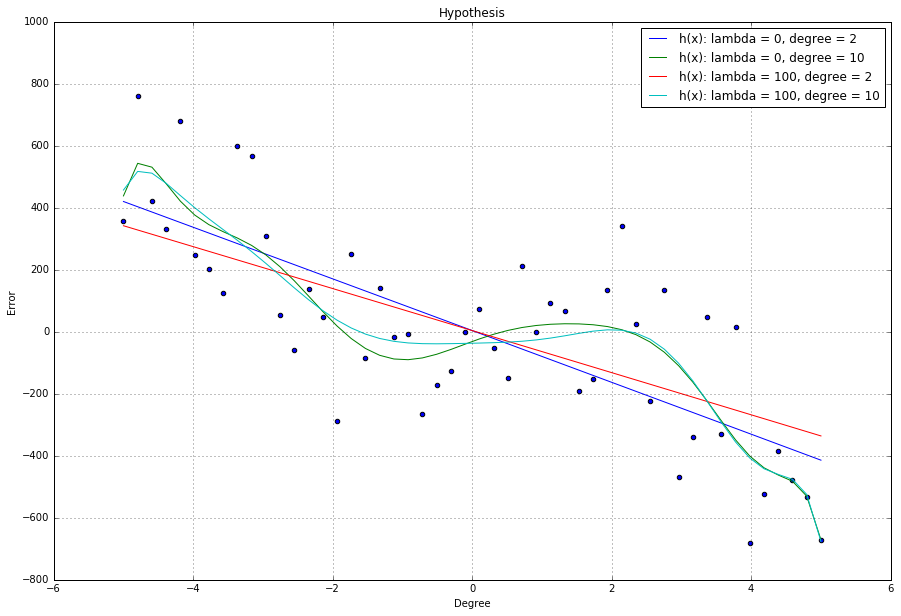

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10   # 10 inches in width, 5 in height

N=50
X = np.linspace(-5,5)
sigma = 200
n = 1
y = make_labels(X,f,noise=sigma)
print X.shape
print y.shape
# plotting data set
plt.scatter(X, y, cmap="colormap")

lambda_list = [0,100]
d_list = [2,10]

for l in lambda_list:
    for d in d_list:
        poly = PolynomialFeatures(d)
        X_design = poly.fit_transform(X.reshape(50,1))
        ridge = Ridge(alpha=l)
        ridge.fit(X_design,y)
        predict = ridge.predict(X_design)
        plt.plot(X, predict, label="h(x): lambda = {}, degree = {}".format(l,d))

plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Hypothesis')
plt.legend(loc ='upper right')
plt.grid(True)
plt.show()   

# Rezultati su očekivani jer model je prejednostavan za degree = 2, vidimo da kada nema regularizacije (lambda=0)
# za degree=10 događa se presložen model tj overfitting hipoteza se prilagođava čak i šumu podataka, dok model koji
# je stupnja 10, a ima smanjenje složenosti regularizacijom (lambda=100) izgleda kao model koji će najbolje
# generalizirati na novim podacima

**Q:** Jesu li rezultati očekivani? Obrazložite.

**Q:** Za koji od ovih četiri modela biste očekivali da će najbolje generalizirati?

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=20,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

In [ ]:
from sklearn import cross_validation
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5   # 10 inches in width, 5 in height


X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5, random_state=42)
lambda_l = range(0,50)
error_train = []
error_test = []
poly_20 = PolynomialFeatures(20)
XTrain_design = poly_20.fit_transform(X_train) 
XTest_design = poly_20.fit_transform(X_test)

for l in lambda_l:
    ridge = Ridge(alpha=l)
    ridge.fit(XTrain_design, y_train)
    
    predict_train = ridge.predict(XTrain_design)
    predict_test = ridge.predict(XTest_design)
    
    error_train.append(0.5*mean_squared_error(y_train, predict_train))
    error_test.append(0.5*mean_squared_error(y_test, predict_test))
    

plt.plot(lambda_l, error_train, label="Train error" , linewidth=2)
plt.plot(lambda_l, error_test, label="Test error", linewidth=2)   
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend(loc ='upper right')
plt.grid(True)
plt.show() 

# Odabrali bismo lambda = 25 otprilike kao dobar model
# Lijeva strana odgovara prenaučenosti jer je regularizacijski izraz minimiziran
# Skroz desna strana i nadalje desno odgovara podnaučenosti jer smo prejako pritegnuli značajke modela i previše 
# pojednostavili model

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti a kojoj podnaučenosti. Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?

**Q:** Jesu li rezultati stabilni? Zašto?

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcija:

In [ ]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[sp.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=20$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$.

In [ ]:
from sklearn.linear_model import Ridge

L0_norm = []
L1_norm = []
L2_norm = []
lambda_list = range(1,101)
poly_20 = PolynomialFeatures(20)
X_design = poly_20.fit_transform(X)
for l in lambda_list:
    ridge = Ridge(alpha=l)
    ridge.fit(X_design,y)
    w = ridge.coef_.T
    L0_norm.append(nonzeroes(w))
    sum_w = sum([abs(x) for x in w])
    L1_norm.append(sum_w)
    L2_norm.append(sum(np.sqrt(np.dot(w.T,w))))


plt.plot(lambda_list, L0_norm, label="L0_norm" , linewidth=2)
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend(loc ='upper right')
plt.grid(True)
plt.legend()
plt.show()
plt.plot(lambda_list, L1_norm, label="L1_norm", linewidth=2) 
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend(loc ='upper right')
plt.grid(True)
plt.legend()
plt.show()
plt.plot(lambda_list, L2_norm, label="L2_norm", linewidth=2) 
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend(loc ='upper right')
plt.grid(True)
plt.legend()
plt.show()

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L1-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [ ]:
from sklearn.linear_model import Lasso

L0_norm = []
L1_norm = []
L2_norm = []
lambda_list = range(1,101)
poly_20 = PolynomialFeatures(20)
X_design = poly_20.fit_transform(X)

for l in lambda_list:
    lasso = Lasso(alpha=l)
    lasso.fit(X_design,y)
    w = ridge.coef_
    L0_norm.append(nonzeroes(ridge.coef_))
    sum_w = sum([abs(x) for x in ridge.coef_])
    L1_norm.append(sum_w)
    L2_norm.append(sum(np.sqrt(np.dot(ridge.coef_.T,ridge.coef_))))

plt.plot(lambda_list, L0_norm, label="L0_norm" , linewidth=2)
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend(loc ='upper right')
plt.grid(True)
plt.legend()
plt.show()
plt.plot(lambda_list, L1_norm, label="L1_norm", linewidth=2) 
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend(loc ='upper right')
plt.grid(True)
plt.legend()
plt.show()
plt.plot(lambda_list, L2_norm, label="L2_norm", linewidth=2) 
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend(loc ='upper right')
plt.grid(True)
plt.legend()
plt.show()

**Q:** Kojem biste modelu (Ridge ili LASSO) u praksi dali prednost, i zašto? U kojim situacijama je ta prednost osobito izražena?

### *7. Predviđanje cijena nekretnina u Bostonu

<span style="color:green">(Rješavanje ovog zadatka nije obavezno, ali donosi dodatne bodove.)</span>

Do sada smo razmatrali isključivo univarijatnu regresiju, tj. imali smo samo jednu značajku ($n=1$). U većini stvarnih problema baratamo s većim brojem značajki. Razmotrimo sada jedan nešto realniji problem, kod kojega postoji više značajki, pa je potrebno napraviti multivarijatnu regresiju.

Učitajte skup podataka *Boston House Prices*:

In [269]:
from sklearn.datasets import load_boston
boston = load_boston()
print boston.data.shape
print boston.target.shape

(506, 13)
(506,)


Skup sadrži 506 primjera sa 13 numeričkih značajki. Opis skupa možete dobiti na sljedeći način:

In [39]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### (a)

Vaš je zadatak da izgradite regresijski model za predviđanje cijene nekretnine (`y=boston.target`) na temelju 13 raspoloživih značajki za svaku nekretninu (`X=boston.data`). Cilj je pronaći najbolji mogući linearni model regresije na ovom skupu podataka i provjeriti njegovu točnost u smislu pogreške kvadratnog odstupanja ([`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)). 

Hiperparametri modela koje treba isprobati su:

* **Regularizacija:** Bez regularizacije ([`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)), L2-regularizacija ([`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)) i L1-regularizacija ([`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso));
* **Značajke:** Izvornih 13 značajki, polinomijalne značajke (isprobajte različite stupnjeve polinoma $d$), samo interakcijske značajke (opcija `interaction_only` u klasi [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html));
* **Predobrada značajki:** Izvorne vrijednosti značajki ili standardizirane vrijednosti. Standardizacija je postupak skaliranja vrijednosti na distribuciju $\mathcal{N}(0,1)$; v. [standard score](http://en.wikipedia.org/wiki/Standard_score). Koristite funkciju [`preprocessing.scale`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale).

Kao i inače, za odabir i ispitivanje modela koristit ćemo **unakrsnu provjeru** (engl. *cross-validation*). Skup primjera za učenje podijelit ćemo na **skup za učenje**, **skup za provjeru** i **skup za ispitivanje** u omjeru (otprilike) 3:1:1. Kao u uvijek, model trebate trenirati na skupu za učenje, odabir modela (odnosno optimizaciju hiperparametra) trebate provesti na skupu za provjeru, a konačno vrednovanje modela trebate načiniti na skupu za ispitivanje. Konačno vrednovanje radite samo jednom, za model koji ste na skupu za provjeru odabrali kao optimalan.

**NB:** Nakon što odaberete optimalan model na skupu za provjeru, prije konačnog ispitivanje odabrani model ponovno trenirajte na uniji skupova za učenje i ispitivanje. Na taj način iskorištavate maksimalno iskorištavate dostupne podatke i model će u pravilu biti bolji.

Podjela na skup za učenje, provjeru i ispitivanje u ovom je slučaju fiksna kako bi svi imali identične skupove i kako bi rezultati bili usporedivi. (U stvarnosti biste ovakav eksperiment radili malo drugačije: koristili biste višestruku unakrsnu provjeru ili ugnježđenu unakrsnu provjeru. Više o tome reći ćemo u četvrtoj laboratorijskoj vježbi.) 

Koristite sljedeće skupove:

In [270]:
from sklearn import cross_validation
X_train, X_rest, y_train, y_rest = cross_validation.train_test_split(boston.data,boston.target,train_size=0.6,random_state=42)
X_validate, X_test, y_validate, y_test = cross_validation.train_test_split(X_rest,y_rest,test_size=0.5,random_state=42)
print X_train.shape, X_validate.shape ,X_test.shape

(303, 13) (101, 13) (102, 13)


In [ ]:
from sklearn import cross_validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from __future__ import division
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5   # 10 inches in width, 5 in height


# Vaše rješenje...

**Q:** Koliko značajki ima svaki od modela koji ste isprobali?

**Q:** Koliko je zapravo dobar model koji ste trenirali? Bi li model bio dovoljno dobar za stvarnu uporabu? Možete li to odlučiti na temelju mjere srednjeg kvadratnog odstupanja, ili bi neki drugi pokazatelj bio korisniji?

**Q:** Provjerite točnost odabranog modela na (1) skupu za učenje, (2) skupu za provjeru, (3) uniji ta dva skupa i (4) skupu za ispitivanje. Jesu li odnosi između točnosti modela na ova četiri skupa očekivana? Obrazložite.

**Q:** Kod treniranja regresijskog modela moguće je postaviti `fit_intercept=False`, čime se izbjegava optimiranje težine $w_0$. Trenirajte odabrani model s tom postavkom. Usporedite s točnošću optimalnog modela. Je li rezultat očekivan? Obrazložite. Ima li predobrada značajki ikakvog utjecaja na ovu razliku?

### (b)

Magnitude težina $w_i$ upućuju na važnost odgovarajućih značajki $x_i$ u modelu. Načinite jednostavnu analizu značajki tako da ispišete rang-liste značajki s obzirom na težine. Analizu provedite nad modelom koji se u prethodnome zadatku pokazao optimalnim, tj. nad modelom koji ste u konačnici ispitivali.

In [42]:
-

**Q**: Koje su top-3 značajke modela? Je li to očekivano? Obrazložite.

**Q**: Kakve rezultate očekujete da biste dobili kada biste model trenirali samo s tih prvih tri značajki?

### 8. Linearna regresija kao klasifikator

U nastavku vježbe bavimo se problemom **klasifikacije**.

Klasifikacijske algoritme analizirat ćemo na skupu podataka `seven`, linearno odvojivom skupu podataka od $N=7$ primjera u $n=2$ dimenzije:

In [4]:
seven_X = sp.array([[2,1],[2,3],[1,2],[3,2],[5,2],[5,4],[6,3]])
seven_y = sp.array([1,1,1,1,-1,-1,-1])
print seven_X.shape
print seven_y.shape

(7, 2)
(7,)


Funkcija za vizualizaciju skupa podataka i granice između klasa (ako je zadana funkcija predikcije `h`):

In [5]:
def plot_problem(X, y, h=None, surfaces=True) :
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision boundaries (surfaces=False) or decision surfaces (surfaces=True)
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if shape(Z_test) == () :
                # h returns a scalar when applied to a matrix; map explicitly
                Z = sp.array(map(h,XX))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = sp.array(map(h,XX))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        if surfaces :
            plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        else :
            plt.contour(xx, yy, Z)
    # Plot the dataset
    scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired,marker='o',s=50);


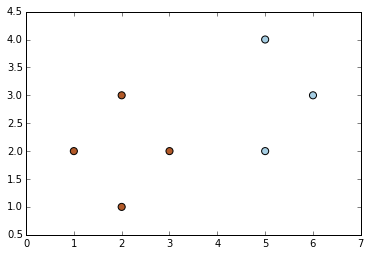

In [6]:
plot_problem(seven_X,seven_y)

Linearna regresija može se upotrijebiti za klasifikaciju tako da se nauči funkcija $f(\mathbf{x})=+1$ za pozitivne primjere i $f(\mathbf{x})=-1$ za negativne primjere. Granica između klasa u tom slučaju bit će funkcija $h(\mathbf{x})=0$, tj. primjeri za koje $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, a ostali kao negativni.  

### (a)

Trenirajte model [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) na skupu `seven`, ispišite težine modela te prikažite primjere i granicu između klasa. Funkciju za predikciju, koju predajete kao treći argument funkcije `plot_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

[-0.5 -0.1]
2.1


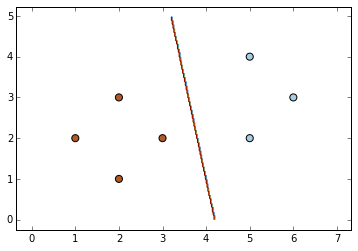

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(seven_X, seven_y)
plot_problem(seven_X, seven_y, lambda x: model.predict(x) >= 0, surfaces=False)

# The coefficients
print model.coef_          # Estimated coefficients for the linear regression problem without w0(independet term)
print model.intercept_     # Independent term in the linear model -> w0 


# Tada bismo računali granicu između klasa h(x) = 0.5

**Q:** Ako bismo kao oznake umjesto $\{+1,-1\}$ koristili $\{1,0\}$, kako biste izračunali granicu između klasa?

Klasifikacija pomoću linearne regresije implementirana je u klasi [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). Pokažite da ta implementacija daje iste rezultate na skupu `seven` (pritom isključite regularizaciju, tj. postavite `alpha=0`).

[[-0.5 -0.1]]
[ 2.1]


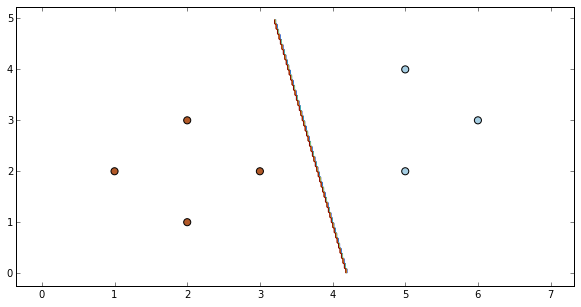

In [32]:
from sklearn.linear_model import RidgeClassifier

alpha = 0  # turning off regularization
Ridge_model = RidgeClassifier(alpha=0)
Ridge_model.fit(seven_X, seven_y)

plot_problem(seven_X, seven_y, lambda x: Ridge_model.predict(x) >= 0, surfaces=False)

# The coefficients
print Ridge_model.coef_          # Estimated coefficients for the linear regression problem without w0(independet term)
print Ridge_model.intercept_     # Independent term in the linear model -> w0 


### (b)

Trenirajte klasifikacijski model `RidgeClassifier` na sljedećem skupu podataka (skup `seven` proširen jednim primjerom):

In [33]:
X2 = sp.append(seven_X,[[2,2]],axis=0)
y2 = sp.append(seven_y,-1)
print X2.shape
print y2.shape

(8, 2)
(8,)


Prikažite granicu između klasa te izračunajte točnost modela (možete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)).

0.5


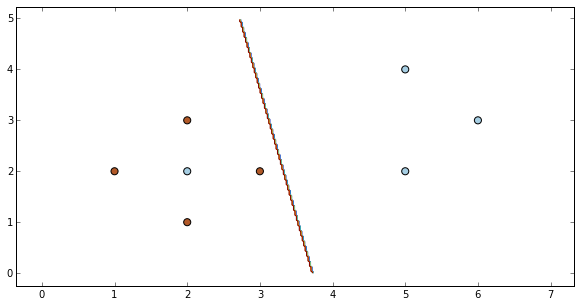

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier

alpha = 0  # turning off regularization
Ridge_model = RidgeClassifier(alpha=0)
Ridge_model.fit(X2, y2)

plot_problem(X2, y2, lambda x: Ridge_model.predict(x) >= 0, surfaces=False)

# The coefficients
#print Ridge_model.coef_          # Estimated coefficients for the linear regression problem without w0(independet term)
#print Ridge_model.intercept_     # Independent term in the linear model -> w0

y2_predicted = [(lambda x: Ridge_model.predict(x) >= 0)(x) for x in X2]
score = accuracy_score(y2, y2_predicted)
print score

# Ne ostvaruje potpunu točnost jer jedan primjer jako utječe na granicu izmeđi podataka, Problem je u modelu !


**Q:** Koliko iznosi točnost modela? Objasnite zašto model ne ostvaruje potpunu točnost. Je li problem u skupu podataka ili u modelu?

### (c)

Trenirajte klasifikacijski model `RidgeClassifier` na sljedećem skupu podataka (skup `seven` proširen jednim primjerom):

In [35]:
X3 = sp.append(seven_X,[[12,8]],axis=0)
y3 = sp.append(seven_y,-1)
print X3.shape
print y3.shape

(8, 2)
(8,)


Prikažite granicu između klasa te izračunajte točnost modela.

0.5


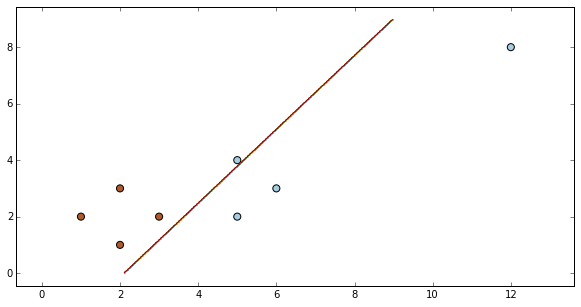

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier

alpha = 0  # turning off regularization
Ridge_model = RidgeClassifier(alpha=0)
Ridge_model.fit(X3, y3)

plot_problem(X3, y3, lambda x: Ridge_model.predict(x) >= 0, surfaces=False)

# The coefficients
#print Ridge_model.coef_          # Estimated coefficients for the linear regression problem without w0(independet term)
#print Ridge_model.intercept_     # Independent term in the linear model -> w0

y3_predicted = [(lambda x: Ridge_model.predict(x) >= 0)(x) for x in X3]
score = accuracy_score(y3, y3_predicted)
print score


**Q:** Koliko iznosi točnost modela? Objasnite zašto model ne ostvaruje potpunu točnost. Je li problem u skupu podataka ili u modelu?

### 9. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan skup podataka od tri klase:

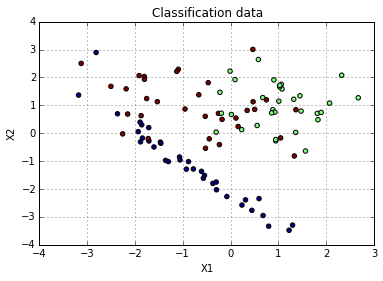

In [15]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Classification data')
plt.grid(True)
plt.show()

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

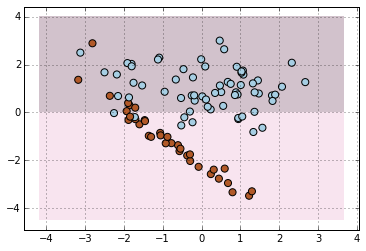

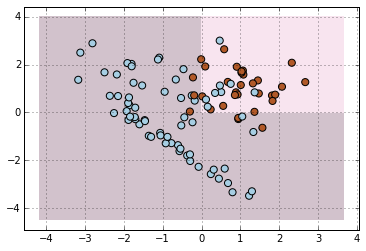

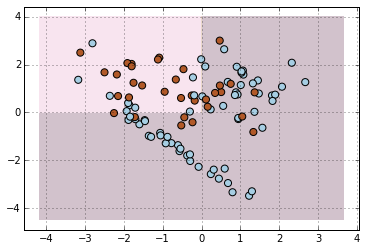

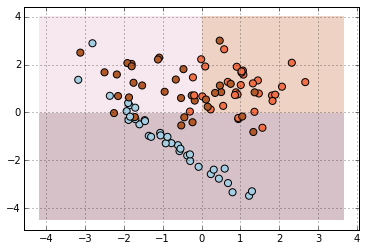

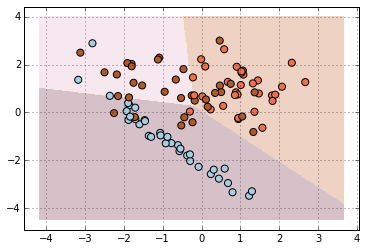

In [16]:
from sklearn.linear_model import RidgeClassifier
from sklearn import naive_bayes
global h1_model
global h2_model
global h3_model
# Our implementation of OVR
h1_model = naive_bayes.BernoulliNB()
y_rest = []
for label in y:
    if label==0:
        y_rest.append(1)
    else:
        y_rest.append(0)
h1_model.fit(X, y_rest)
plot_problem(X, y_rest, h1_model.predict)
plt.grid(True)
plt.show()

y_rest = []
h2_model = naive_bayes.BernoulliNB()
y_rest = []
for label in y:
    if label==1:
        y_rest.append(1)
    else:
        y_rest.append(0)
h2_model.fit(X, y_rest)
plot_problem(X, y_rest, h2_model.predict)
plt.grid(True)
plt.show()


y_rest = []
h3_model = naive_bayes.BernoulliNB()
y_rest = []
for label in y:
    if label==2:
        y_rest.append(1)
    else:
        y_rest.append(0)
h3_model.fit(X, y_rest)
plot_problem(X, y_rest, h3_model.predict)
plt.grid(True)
plt.show()

# class in max value for model.predict(x)
plot_problem(X, y, h=lambda x: argmax([h1_model.predict(x), h2_model.predict(x), h3_model.predict(x)]));
plt.grid(True)
plt.show()


# RidgeClassifier implements OVR internaly
ridge_model = RidgeClassifier(alpha=0)
ridge_model.fit(X,y)

plot_problem(X, y, ridge_model.predict, surfaces=True)
plt.grid(True)
plt.show()

**Q4:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

### 10. Perceptron

Perceptron je implementiran klasom [`linear_model.Perceptron`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). Trenirajte perceptron na skupu `seven` iz zadatka 8a i prikažite granicu između klasa. Uvjerite se da rezultat ovisi o redoslijedu primjera u skupu za učenje (postavite `shuffle=True` i mijenjajte parametar `random_state`). Zatim trenirajte perceptron na dvama varijantima skupa `seven` iz zadataka 8b i 8c te prikažite opet granice između klasa.

**NB:** Obratite pozornost na broj iteracija algoritma (parametar `n_iter`).

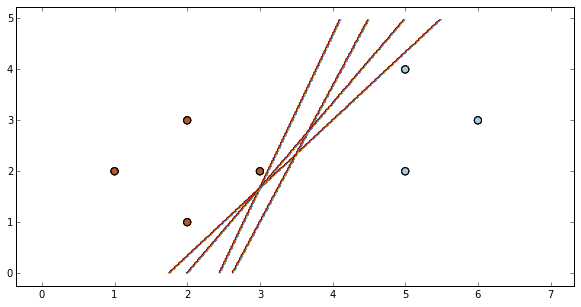

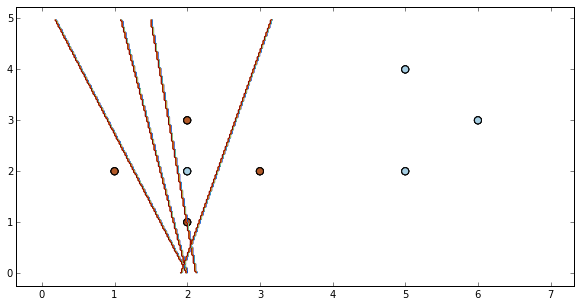

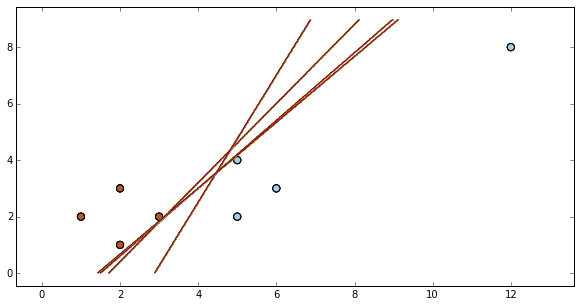

In [42]:
from sklearn.linear_model import Perceptron

# Podaci iz 8a
seven_X = sp.array([[2,1],[2,3],[1,2],[3,2],[5,2],[5,4],[6,3]])
seven_y = sp.array([1,1,1,1,-1,-1,-1])

rand_state = [3,8,12,15]

for r in rand_state:
    perc = Perceptron(shuffle=True, random_state=r, n_iter=100)
    perc.fit(seven_X, seven_y)
    plot_problem(seven_X, seven_y, perc.predict, surfaces=False)
plt.show()

# Podaci iz 8b
for r in rand_state:
    perc = Perceptron(shuffle=True, random_state=r, n_iter=100)
    perc.fit(X2, y2)
    plot_problem(X2, y2, perc.predict, surfaces=False)
plt.show()

# Podaci 8c
for r in rand_state:
    perc = Perceptron(shuffle=True, random_state=r, n_iter=100)
    perc.fit(X3, y3)
    plot_problem(X3, y3, perc.predict, surfaces=False)
plt.show()

**Q:** Komentirajte razlike u rezultatima dobivenima na skupu `seven` i na dvije njegove varijante.

In [ ]:
# Na perceptron neće jako utjecati novi primjer koji je dobro klasificiran 
# Dobro klasificirani primjeri neće utjecati na granicu uopće dok negativno klasificirani primjeri 
# će kažnjavati granicu i pomicati je

In [9]:
# Zadaca 5. 1)

X_data = sp.array([[-3,1],[-3,3],[1,2],[2,1],[1,-2],[2,-3]])
y_data = sp.array([0,0,1,1,2,2])
print seven_X.shape
print seven_y.shape

(7, 2)
(7,)


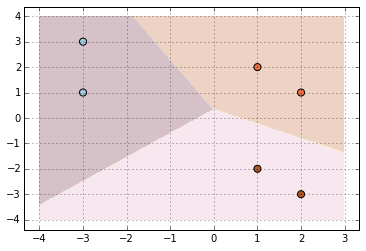

In [12]:
from sklearn.linear_model import RidgeClassifier

# RidgeClassifier implements OVR internaly
ridge_model = RidgeClassifier(alpha=0)
ridge_model.fit(X_data,y_data)

plot_problem(X_data, y_data, ridge_model.predict, surfaces=True)
plt.grid(True)
plt.show()